# Overview Hovmoeller plots

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.gridspec as gs
import h5py
import cftime
import matplotlib.dates as mdates

import sys
sys.path.append("modules/")
import prepare_and_bin

# Figure 1, YoMaHa'07 binned zonal velocity along equator at 1000m depth in the Atlantic

In [ ]:
# load data
lon, lat, time, depth, u = prepare_and_bin.prepare_argo("data/yomaha/yomaha07.dat", 1000, (-7,7))

# bin data
dt = 7  # in days, i.e. weekly
dlat = 2   # in degrees, 1S to 1N
dlon = 5
binned_u_ds = prepare_and_bin.bin_argo(lon, lat, time, u, dlon, dlat, dt, (-1,1))

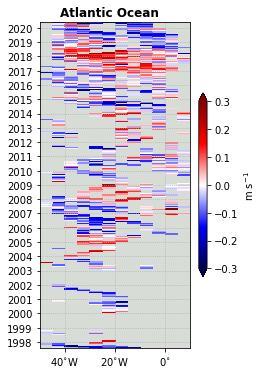

In [14]:
plt.rcParams["font.size"] = 10

plt.figure(figsize=(3,6))

ax1 = plt.subplot(111)
ax1.set_facecolor("xkcd:light grey")
# Yomaha u is in cm/s, therefore division by 100 to get m/s:
(binned_u_ds.binned_u / 100).plot(vmin=-0.3, vmax=0.3, cmap="seismic", rasterized=True, cbar_kwargs={"label": r"m s$^{-1}$", "fraction": 0.05})
plt.title("")
plt.text(-42, 7600, "Atlantic Ocean", fontweight="bold", fontsize=12)
ax1.set_xticks(np.arange(-40,20,20))
ax1.set_xticklabels(([r"40$^{\circ}$W"] + [r"20$^{\circ}$W"] + [r"0$^{\circ}$"]))
plt.xlabel("")
plt.ylabel("")
ax1.set_yticks(np.arange(-2*365.25, 365.25*21, 365.25))
ax1.set_yticklabels(np.arange(1998, 2021))
ax1.set_xlim([-50,10])
plt.grid(linestyle="dotted")

plt.savefig("Figures/Figure1_hovmoeller_yomaha_atlantic.pdf", bbox_inches="tight", dpi=300)

# Figure 2, Mooring data hovmoeller plot at 23W 

In [ ]:
mdates.set_epoch("0001-01-01T00:00:00")

In [ ]:
# load data at 23W
with h5py.File("data/Mooring_data/velocities_23W_2001_2019_interp.mat", "r") as file:
    U = np.array(file['U'])
    V = np.array(file['V'])
    P = np.array(file['P'])
    time = np.array(file['TIME'])
    
vel_23W_obs = xr.Dataset({'u':(['pres', 'time'], U.transpose()),
                         'v':(['pres', 'time'], V.transpose())},
                        coords={'pres': P[:,0],
                               'time': mdates.num2date(time[0,:])}
                        )
vel_23W_obs = vel_23W_obs.chunk({'pres':20,'time':100})

In [ ]:
plt.figure(figsize=(8,4))

ax1 = plt.subplot(111)
ax1.set_facecolor("xkcd:light grey")
vel_23W_obs.u.compute().plot(yincrease=False, vmin=-0.3, vmax=0.3, cmap='seismic', rasterized=True, cbar_kwargs={"label": r"m s$^{-1}$"})
ax1.grid()
plt.ylabel("Pressure in dbar")
plt.xlabel("")
plt.savefig("Figures/Figure2_mooring_data.pdf", bbox_inches="tight", dpi=300)